In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv("DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3]:
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
                  'Customer Lname','Customer Zipcode'],axis=1)
data.shape

(180519, 40)

In [4]:
train_data=data.copy()

In [5]:
#Dropping columns with repeated values
train_data.drop(['Late_delivery_risk','order date (DateOrders)',
                'Days for shipping (real)','Days for shipment (scheduled)','Category Id','Sales',
                'Customer Id','Department Id','Order Customer Id','Order Id',
                'Order Item Cardprod Id','Order Item Id','Product Card Id','Product Category Id',
                'Order Item Product Price','Benefit per order','Sales per customer',
                 'Order Item Product Price'
                ], axis=1, inplace=True)

In [6]:
# Columns to label encode
columns_to_encode = ['Type', 'Category Name','Customer City','Customer Country','Customer Segment',
                    'Customer State','Department Name','Market','Order City','Order Country','Order Region',
                    'Order State','Order Status','Product Name','Shipping Mode','Delivery Status']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for col in columns_to_encode:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [7]:
train_data_new = train_data.drop(columns = 'Customer Segment')

In [8]:
# selected_columns_quan = ['Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio',
#                    'Order Item Quantity','Order Item Total','Order Profit Per Order','Product Price']
# # selected_columns_quan = train_data_new.columns
# scaler = StandardScaler()
# scaler.fit(train_data_new[selected_columns_quan])
# train_data_new[selected_columns_quan] = scaler.transform(train_data_new[selected_columns_quan])

In [9]:
train_data_segmentation = train_data_new

In [10]:
train_data_segmentation

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer State,Department Name,Market,Order City,Order Country,...,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,1,0,40,66,1,36,4,3,331,70,...,0.29,1,314.640015,91.250000,15,475,2,78,327.750000,3
1,3,1,40,66,1,36,4,3,391,69,...,-0.80,1,311.359985,-249.089996,13,841,5,78,327.750000,3
2,0,3,40,452,0,5,4,3,391,69,...,-0.80,1,309.720001,-247.779999,13,841,1,78,327.750000,3
3,1,0,40,285,0,5,4,3,3226,8,...,0.08,1,304.809998,22.860001,11,835,2,78,327.750000,3
4,2,0,40,66,1,36,4,3,3226,8,...,0.45,1,298.250000,134.210007,11,835,6,78,327.750000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,3,18,59,0,31,3,3,2922,31,...,0.10,1,399.980011,40.000000,7,913,1,24,399.980011,3
180515,1,1,18,26,0,5,3,3,1362,77,...,-1.55,1,395.980011,-613.770019,7,770,2,24,399.980011,2
180516,3,1,18,55,0,7,3,3,25,8,...,0.36,1,391.980011,141.110001,11,88,5,24,399.980011,3
180517,2,0,18,66,1,36,3,3,25,8,...,0.48,1,387.980011,186.229996,11,88,6,24,399.980011,3


In [11]:
train_data_segmentation = train_data_segmentation[['Type', 'Delivery Status',
       'Customer Country', 'Department Name', 'Market','Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order Status','Shipping Mode']]

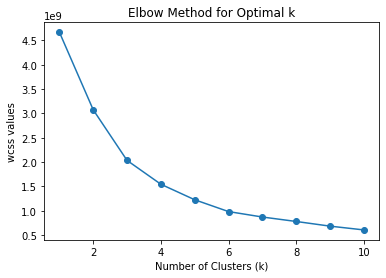

In [12]:
from sklearn.cluster import KMeans

wcss = [] # within clusters sum of squres
max_k = 10

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k , init = 'k-means++' , random_state=0)
    kmeans.fit(train_data_segmentation)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, max_k+1), wcss , marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss values')
plt.show()

In [13]:
kmeans_model = KMeans(n_clusters = 3 , init = 'k-means++' , random_state=0)
kmean_fitmodel = kmeans_model.fit(train_data_segmentation)

In [14]:
train_data_segmentation['labels'] = kmeans_model.fit_predict(train_data_segmentation)

/var/folders/27/gbz_5drj4l13l6x8mnk54j1w0000gn/T/ipykernel_2571/2817370545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_segmentation['labels'] = kmeans_model.fit_predict(train_data_segmentation)


In [15]:
train_data_segmentation['labels'].value_counts()

0    122803
2     50019
1      7697
Name: labels, dtype: int64

In [16]:
df_segm_analysis = train_data_segmentation.groupby(['labels']).mean()
df_segm_analysis

,Type,Delivery Status,Customer Country,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Region,Order Status,Shipping Mode
labels,,,,,,,,,,,,,,
0,1.675163,1.170387,0.385039,3.233227,2.119321,14.689619,0.105038,0.154519,2.053655,121.904631,19.587966,12.063573,3.885133,2.233032
1,1.696245,1.159673,0.387813,3.196050,2.090035,29.266681,0.095818,-1.339701,2.322593,271.218719,-334.615869,12.217617,3.941016,2.258153
2,1.671825,1.167956,0.381935,3.285771,2.080609,34.010746,0.094296,0.262206,2.279274,319.810023,82.708179,12.275915,3.880106,2.235570
